In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file=pd.read_csv("C:\\Users\\Admin\\Desktop\\yuvan\\PYTHON\\DATA_ANALYSIS_PROJECT\\student-scores.csv")
gender=file["gender"].value_counts()
female=gender["female"]
male=gender["male"]

In [114]:
absent_mean=file["absence_days"].value_counts().mean()
absent_median=file["absence_days"].value_counts().median()
absent_mode=file["absence_days"].mode()[0]

Absent Mean Value :  181.8181818181818
Absent Median Value :  136.0
Absent Mode Value :  2
               math_score  history_score  physics_score  chemistry_score  \
part_time_job                                                              
False           84.514846      80.942993      82.009501        80.488717   
True            77.787975      77.075949      77.750000        77.363924   

               biology_score  english_score  geography_score  
part_time_job                                                 
False              79.605701      81.792162        81.040974  
True               79.452532      78.534810        80.072785  
                    math_score  history_score  physics_score  chemistry_score  \
self_study_grouped                                                              
0-5                  75.254425      75.573009      78.110619        77.276549   
6-10                 75.974093      78.212435      80.849741        78.471503   
11-20                85.8349

C:\Users\Admin\AppData\Local\Temp\ipykernel_19328\3516626267.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self_learn_mark = file.groupby('self_study_grouped')[['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']].mean()


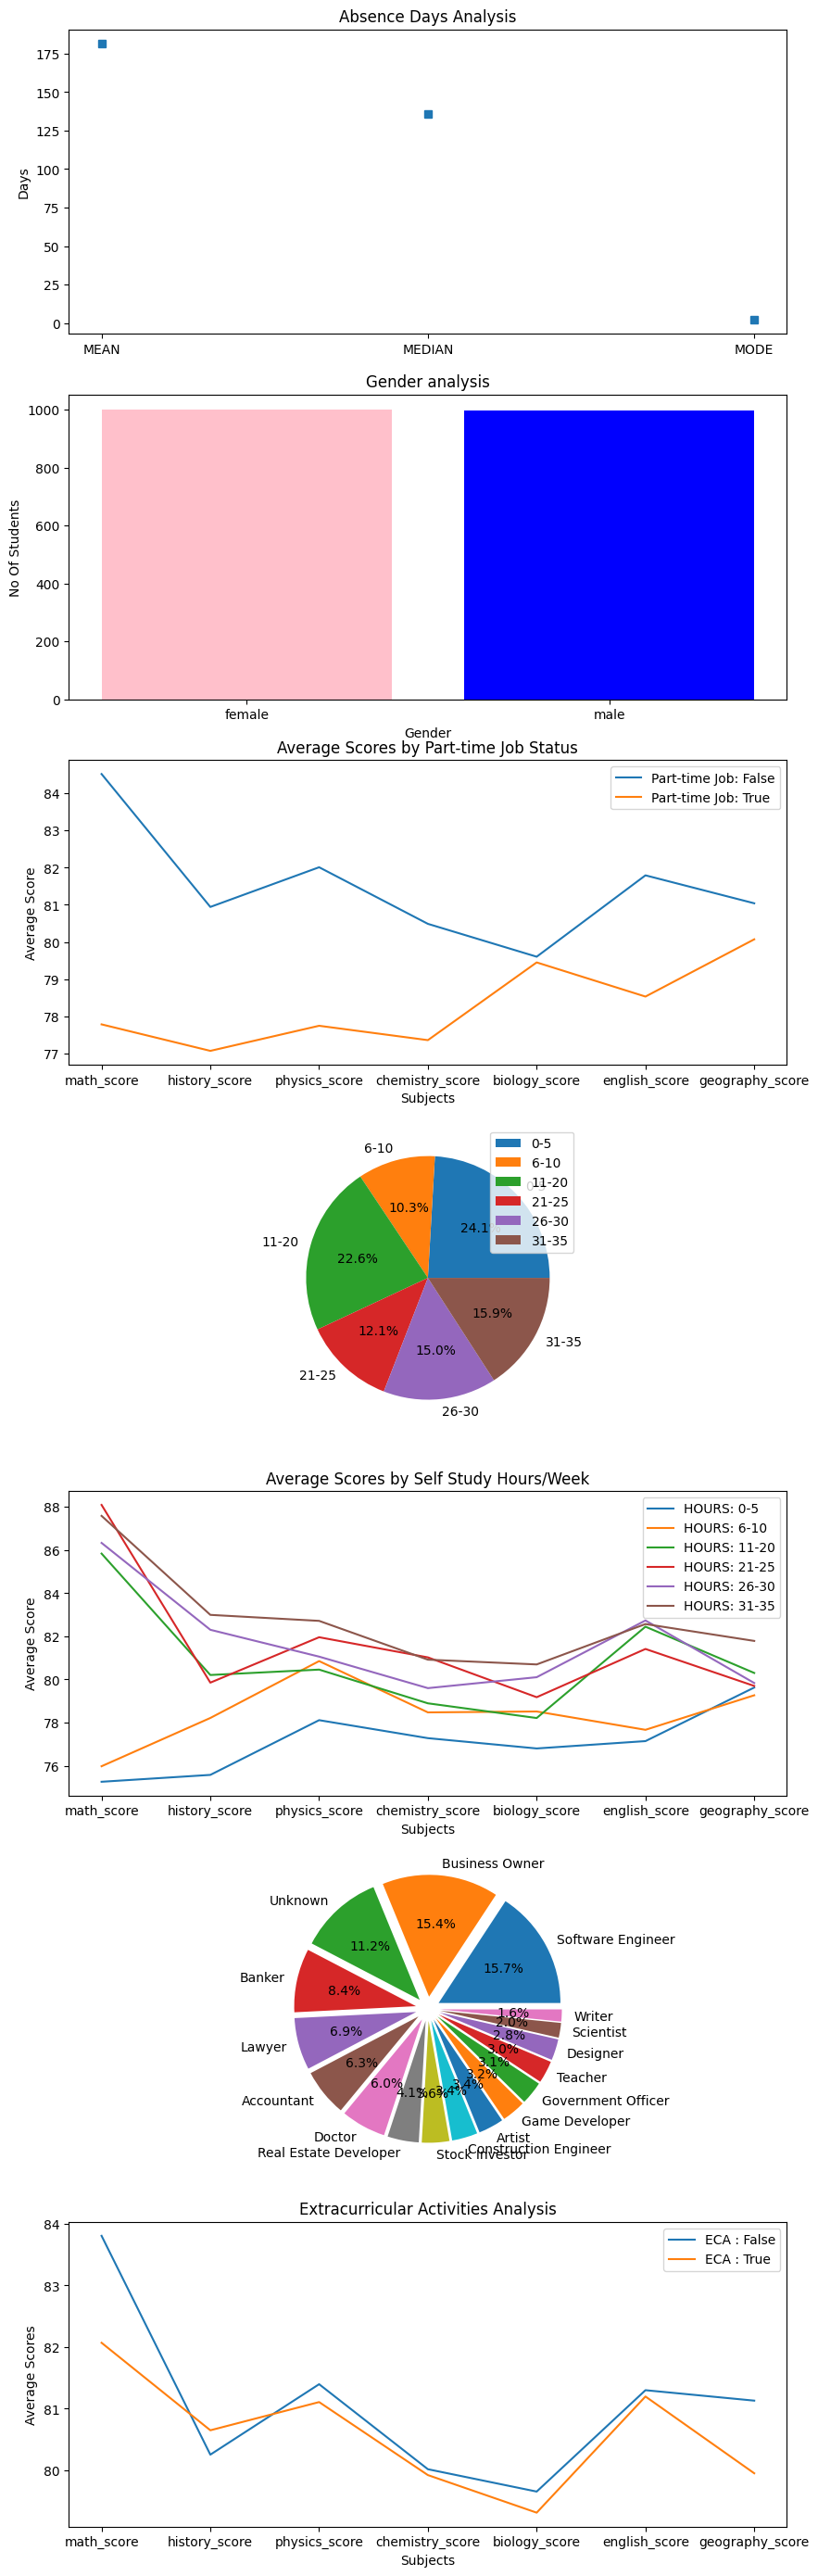

In [158]:
print("Absent Mean Value : ",absent_mean)
print("Absent Median Value : ",absent_median)
print("Absent Mode Value : ",absent_mode)
part_mark = file.groupby('part_time_job')[['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']].mean()
print(part_mark)

fig,axs = plt.subplots(7, 1, figsize=(10, 35))
axs[0].plot(["MEAN", "MEDIAN", "MODE"], [absent_mean, absent_median, absent_mode],"s")
axs[0].set_title("Absence Days Analysis")
axs[0].set_ylabel("Days")



axs[1].bar(["female","male"],[female,male],color=["pink","blue"])
axs[1].set_title("Gender analysis")
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("No Of Students")

for part_time, data in part_mark.iterrows():
    axs[2].plot(data.index, data, label=f"Part-time Job: {part_time}")

axs[2].set_title("Average Scores by Part-time Job Status")
axs[2].set_xlabel("Subjects")
axs[2].set_ylabel("Average Score")
axs[2].legend()

bins = [0, 5, 10, 20, 25, 30, 35]
labels = ['0-5', '6-10', '11-20', '21-25', '26-30', '31-35']
file['self_study_grouped'] = pd.cut(file['weekly_self_study_hours'], bins=bins, labels=labels, right=False)
self_study_grouped = file['self_study_grouped'].value_counts().sort_index()
axs[3].pie(self_study_grouped,labels=self_study_grouped.index,autopct='%1.1f%%')
axs[3].legend()

self_learn_mark = file.groupby('self_study_grouped')[['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']].mean()
print(self_learn_mark)
for self_l, data in self_learn_mark.iterrows():
    axs[4].plot(data.index, data, label=f"HOURS: {self_l}")
axs[4].set_title("Average Scores by Self Study Hours/Week")
axs[4].set_xlabel("Subjects")
axs[4].set_ylabel("Average Score")
axs[4].legend()
explode = [0.1] * len(carrer)
carrer=file["career_aspiration"].value_counts()
print(carrer)
axs[5].pie(carrer,labels=carrer.index,autopct='%1.1f%%',explode=explode)


ext=file.groupby('extracurricular_activities')[['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']].mean()
print(ext)

for ext_l,data in ext.iterrows():
    axs[6].plot(data.index,data,label=f"ECA : {ext_l}")
axs[6].set_title("Extracurricular Activities Analysis")
axs[6].set_xlabel("Subjects")
axs[6].set_ylabel("Average Scores")
axs[6].legend()